# 데이터셋 구하기

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
#한글 설정
plt.rc("font", family="HYHeadLine-Medium")
# plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축

# 경고 메세지 안 보이게 
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

import seaborn as sns
import pandas as pd 
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

In [2]:
list_y2018=[]
for i in range(1,13):
    if len(str(i))==1:
        list_y2018.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_20180'+str(i)+'.csv'))
    elif len(str(i))==2:
        list_y2018.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_2018'+str(i)+'.csv'))
y2018 = pd.DataFrame([], columns=list_y2018[0].columns)
for item in list_y2018:
    y2018 =pd.concat([y2018, item]) 
    
list_y2019=[]
for i in range(1,13):
    if len(str(i))==1:
        list_y2019.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_20190'+str(i)+'.csv'))
    elif len(str(i))==2:
        list_y2019.append(pd.read_csv('체력측정 항목별 측정데이터\KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_2019'+str(i)+'.csv'))

y2019 = pd.DataFrame([], columns=list_y2019[0].columns)
for item in list_y2019:
    y2019 =pd.concat([y2019, item])

combined_data=pd.concat([y2018,y2019],ignore_index=True)
combined_data.columns=['측정회차','센터명','나이구분','측정구분','측정나이','입력구분','상장구분','측정일','측정회원성별',
                      '신장:cm','체중:kg','체지방율%','허리둘레:cm','혈압(최저):mmHg','혈압(최고):mmHg','악력D:kg','악력ND:kg',
                      '윗몸말아올리기:회','반복점프:회','미정','앉아윗몸앞으로굽히기:cm','일리노이:초','체공시간:초','협응력시간:초',
                      '협응력실수횟수:회','협응력계산결과값:초','BMI:kg/m','교차윗몸일으키기:회','왕복오래달리기','10M 4회 왕복달리기:초',
                      '제자리 멀리뛰기:cm','의자에앉았다일어서기:회','6분걷기:m','2분제자리걷기:회','의자에앉아 3M표적 돌아오기:회',
                      '8자보행:초','상대악력:%','피두부결합','왕복오래달리기(출력):Vo2 max','트레드밀_안정시 : bpm','트레드밀_3분 : bpm',
                      '트레드밀_6분 : bpm','트레드밀_9분 : bpm','트레드밀(출력) : VO₂max','스텝검사_회복시 심박수 : bpm','스텝검사(출력) : VO₂max',
                      '허벅지(좌)','허벅지(우)','전신반응 : 초','체공시간2 : 초']

In [3]:
# 문자를 숫자화
def chang_result(x):
    if x=='참가증':
        return 0
    elif x=='1등급':
        return 1
    elif x=='2등급':
        return 2
    elif x=='3등급':
        return 3
combined_data['결과값']=combined_data['상장구분'].apply(chang_result)
adult_data=combined_data.loc[combined_data['나이구분']=='성인']
adult_data=adult_data[['측정나이','측정회원성별','악력D:kg','교차윗몸일으키기:회','앉아윗몸앞으로굽히기:cm','왕복오래달리기','제자리 멀리뛰기:cm','체지방율%','BMI:kg/m','결과값']]
adult_data.dropna(inplace=True)

In [4]:
#adult_data.info()

In [5]:
#adult_data.isnull().sum()

In [6]:
corr=adult_data.corr()

Text(0.1, 0.3, '   상관관계 ')

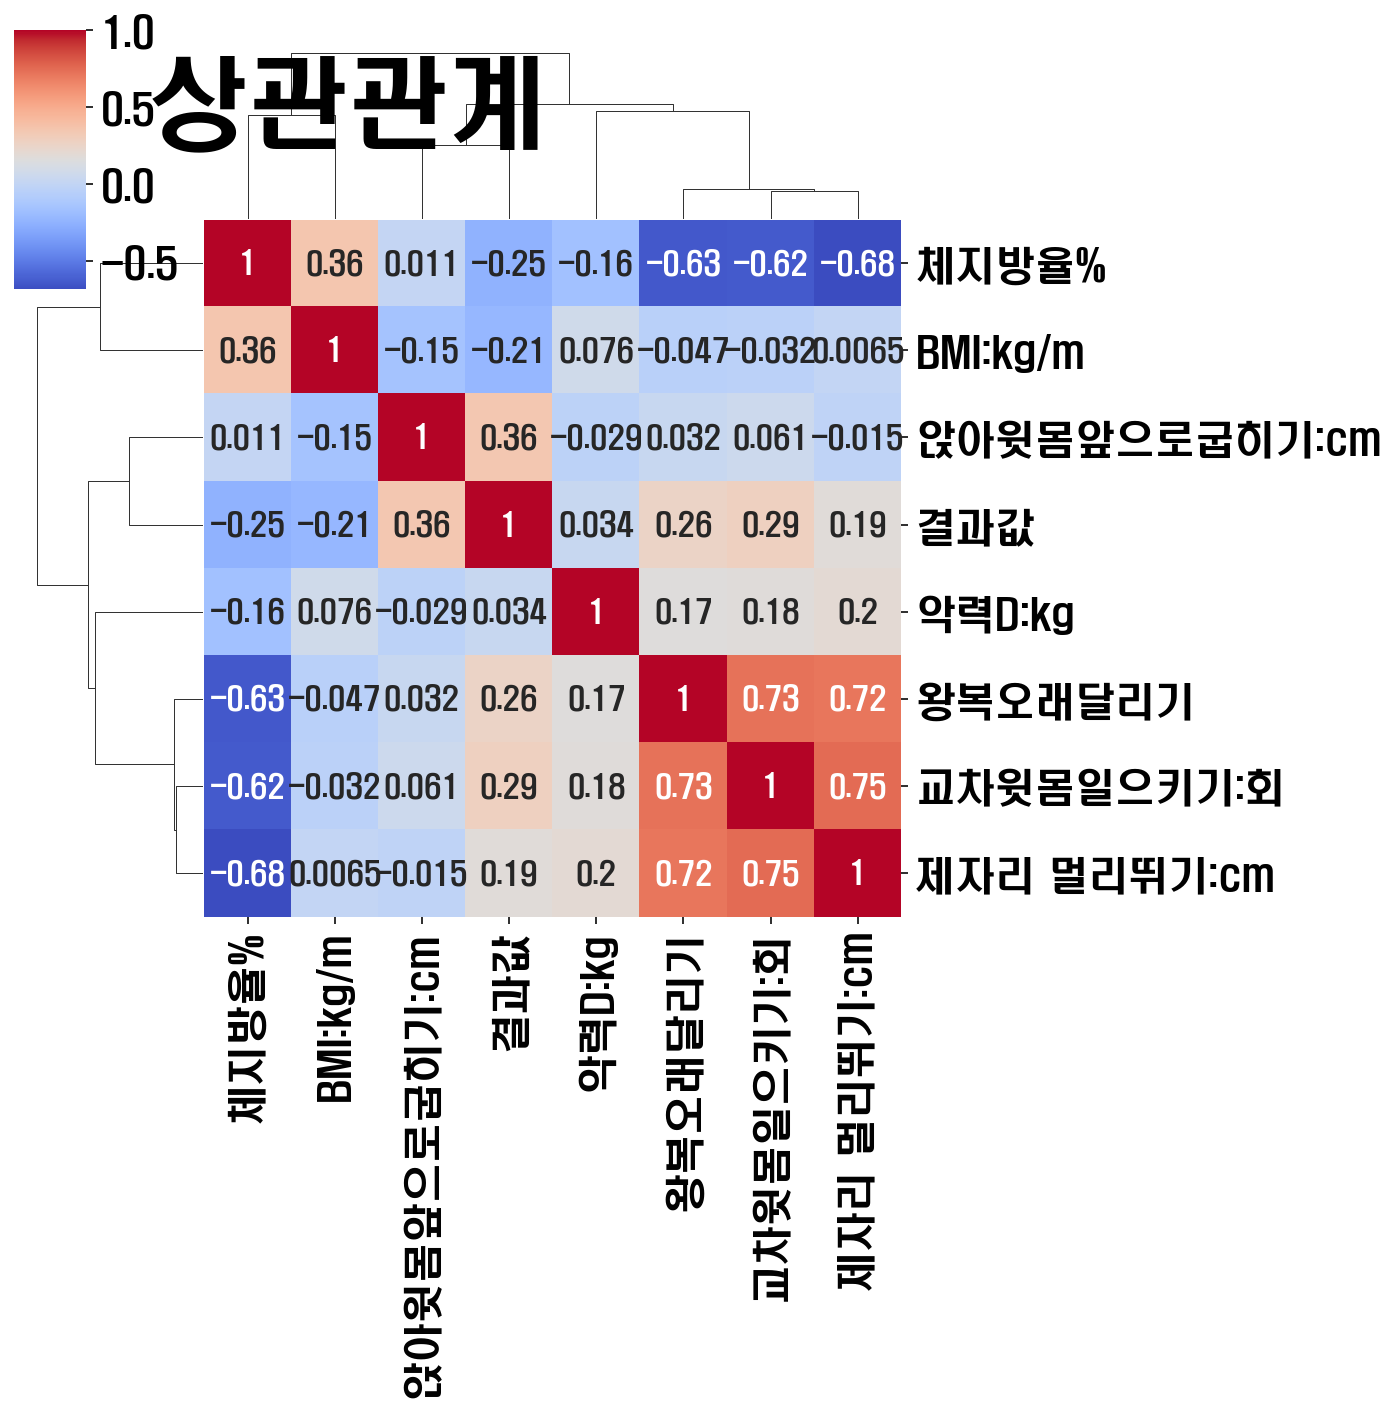

In [7]:
plt.rcParams['font.size'] = 20
bg_color = (0.88,0.85,0.95)
bg_color1 = '#FFFFFF'
plt.rcParams['figure.facecolor'] = bg_color1
# plt.rcParams['axes.facecolor'] = bg_color
sns.clustermap(corr,annot = True,      # 실제 값 화면에 나타내기
               cmap = 'coolwarm',  # Red, Yellow, Blue 색상으로 표시
#                vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
                       annot_kws={"fontsize": 15}, square=True ,
                          cbar=True,)
plt.text(0.1,0.3, "   상관관계 ", fontsize = 50, color='black')#, fontstyle='italic')

# 딥러닝

In [8]:
import tensorflow.keras.utils as utils # 분류분석시 원핫인코딩 시
from tensorflow.keras.models import Sequential # 모델 생성 시
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout
import numpy as np

In [9]:
def change_number(x):
    if x=='F':
        return 0
    elif x=='M':
        return 1
adult_data['측정회원성별']=adult_data['측정회원성별'].apply(change_number)
        

In [10]:
adult_data.head(3)

,측정나이,측정회원성별,악력D:kg,교차윗몸일으키기:회,앉아윗몸앞으로굽히기:cm,왕복오래달리기,제자리 멀리뛰기:cm,체지방율%,BMI:kg/m,결과값
3,22,0,23.2,28.0,20.7,24.0,150.0,31.5,21.1,3
4,26,0,23.7,39.0,23.3,31.0,150.0,24.2,21.1,2
5,48,0,19.0,4.0,-0.3,10.0,152.0,27.0,21.6,0


In [11]:
practice=adult_data.iloc[0:10000]
practice['측정회원성별']=practice['측정회원성별'].apply(lambda x: float(x))

# scale 조절

In [12]:
X_train=practice.iloc[:,:-1]

# x의 9가지 독립변수  scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_input = scaler.transform(X_train)
scaled_input = pd.DataFrame(scaled_input)
scaled_input
X_train=scaled_input.to_numpy()

#종속변수를 원핫인코딩
Target=practice[['결과값']]
Y_train=utils.to_categorical(Target,4)

# 10000개 데이터만 추출 검증데이터 1000개

In [13]:
X_v=X_train[0:1000]
Y_v=Y_train[0:1000]
X_t=X_train[1000:10000]
Y_t=Y_train[1000:10000]

# 모델구상하기

In [47]:
model = Sequential()
model.add(Dense(units=500, input_dim=9, activation="elu"))
model.add(Dropout(0.1))
model.add(Dense(units=200, activation="elu"))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation="elu"))
model.add(Dropout(0.1))
model.add(Dense(units=4, activation="softmax"))

# 모델학습과정 설정하기

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='sgd',
             metrics=['accuracy'])

# 모델 학습하기

In [49]:
hist = model.fit(X_t, Y_t, epochs=300, batch_size=10, 
                 verbose=2, validation_data=(X_v, Y_v)) 

Epoch 1/300
900/900 - 1s - loss: 0.7014 - accuracy: 0.6902 - val_loss: 0.5988 - val_accuracy: 0.7270
Epoch 2/300
900/900 - 1s - loss: 0.6038 - accuracy: 0.7232 - val_loss: 0.5642 - val_accuracy: 0.7430
Epoch 3/300
900/900 - 1s - loss: 0.5849 - accuracy: 0.7352 - val_loss: 0.5512 - val_accuracy: 0.7390
Epoch 4/300
900/900 - 1s - loss: 0.5714 - accuracy: 0.7391 - val_loss: 0.5428 - val_accuracy: 0.7550
Epoch 5/300
900/900 - 1s - loss: 0.5588 - accuracy: 0.7474 - val_loss: 0.5313 - val_accuracy: 0.7590
Epoch 6/300
900/900 - 1s - loss: 0.5424 - accuracy: 0.7539 - val_loss: 0.5087 - val_accuracy: 0.7690
Epoch 7/300
900/900 - 1s - loss: 0.5288 - accuracy: 0.7588 - val_loss: 0.4920 - val_accuracy: 0.7830
Epoch 8/300
900/900 - 1s - loss: 0.5103 - accuracy: 0.7654 - val_loss: 0.4819 - val_accuracy: 0.7840
Epoch 9/300
900/900 - 1s - loss: 0.4974 - accuracy: 0.7727 - val_loss: 0.4652 - val_accuracy: 0.7970
Epoch 10/300
900/900 - 1s - loss: 0.4852 - accuracy: 0.7846 - val_loss: 0.4565 - val_accura

Epoch 82/300
900/900 - 1s - loss: 0.3079 - accuracy: 0.8650 - val_loss: 0.3007 - val_accuracy: 0.8690
Epoch 83/300
900/900 - 1s - loss: 0.3108 - accuracy: 0.8618 - val_loss: 0.2915 - val_accuracy: 0.8720
Epoch 84/300
900/900 - 1s - loss: 0.3079 - accuracy: 0.8642 - val_loss: 0.2857 - val_accuracy: 0.8710
Epoch 85/300
900/900 - 1s - loss: 0.3044 - accuracy: 0.8648 - val_loss: 0.3085 - val_accuracy: 0.8700
Epoch 86/300
900/900 - 1s - loss: 0.3099 - accuracy: 0.8604 - val_loss: 0.2986 - val_accuracy: 0.8660
Epoch 87/300
900/900 - 1s - loss: 0.3093 - accuracy: 0.8644 - val_loss: 0.2919 - val_accuracy: 0.8710
Epoch 88/300
900/900 - 1s - loss: 0.3071 - accuracy: 0.8642 - val_loss: 0.2931 - val_accuracy: 0.8750
Epoch 89/300
900/900 - 1s - loss: 0.3061 - accuracy: 0.8664 - val_loss: 0.2899 - val_accuracy: 0.8740
Epoch 90/300
900/900 - 1s - loss: 0.3056 - accuracy: 0.8661 - val_loss: 0.2913 - val_accuracy: 0.8710
Epoch 91/300
900/900 - 1s - loss: 0.3022 - accuracy: 0.8662 - val_loss: 0.2834 - v

Epoch 162/300
900/900 - 1s - loss: 0.2765 - accuracy: 0.8763 - val_loss: 0.2755 - val_accuracy: 0.8720
Epoch 163/300
900/900 - 1s - loss: 0.2752 - accuracy: 0.8752 - val_loss: 0.2803 - val_accuracy: 0.8710
Epoch 164/300
900/900 - 1s - loss: 0.2758 - accuracy: 0.8822 - val_loss: 0.2767 - val_accuracy: 0.8800
Epoch 165/300
900/900 - 1s - loss: 0.2780 - accuracy: 0.8772 - val_loss: 0.2760 - val_accuracy: 0.8720
Epoch 166/300
900/900 - 1s - loss: 0.2733 - accuracy: 0.8787 - val_loss: 0.2742 - val_accuracy: 0.8800
Epoch 167/300
900/900 - 1s - loss: 0.2748 - accuracy: 0.8796 - val_loss: 0.2814 - val_accuracy: 0.8720
Epoch 168/300
900/900 - 1s - loss: 0.2687 - accuracy: 0.8826 - val_loss: 0.2743 - val_accuracy: 0.8760
Epoch 169/300
900/900 - 1s - loss: 0.2748 - accuracy: 0.8786 - val_loss: 0.2838 - val_accuracy: 0.8610
Epoch 170/300
900/900 - 1s - loss: 0.2746 - accuracy: 0.8763 - val_loss: 0.2754 - val_accuracy: 0.8790
Epoch 171/300
900/900 - 1s - loss: 0.2749 - accuracy: 0.8803 - val_loss: 

Epoch 242/300
900/900 - 1s - loss: 0.2585 - accuracy: 0.8869 - val_loss: 0.2610 - val_accuracy: 0.8810
Epoch 243/300
900/900 - 1s - loss: 0.2523 - accuracy: 0.8903 - val_loss: 0.2684 - val_accuracy: 0.8800
Epoch 244/300
900/900 - 1s - loss: 0.2570 - accuracy: 0.8848 - val_loss: 0.2657 - val_accuracy: 0.8770
Epoch 245/300
900/900 - 1s - loss: 0.2484 - accuracy: 0.8909 - val_loss: 0.2631 - val_accuracy: 0.8830
Epoch 246/300
900/900 - 1s - loss: 0.2561 - accuracy: 0.8879 - val_loss: 0.2663 - val_accuracy: 0.8800
Epoch 247/300
900/900 - 1s - loss: 0.2528 - accuracy: 0.8883 - val_loss: 0.2673 - val_accuracy: 0.8790
Epoch 248/300
900/900 - 1s - loss: 0.2533 - accuracy: 0.8912 - val_loss: 0.2670 - val_accuracy: 0.8790
Epoch 249/300
900/900 - 1s - loss: 0.2538 - accuracy: 0.8850 - val_loss: 0.2677 - val_accuracy: 0.8820
Epoch 250/300
900/900 - 1s - loss: 0.2557 - accuracy: 0.8880 - val_loss: 0.2670 - val_accuracy: 0.8750
Epoch 251/300
900/900 - 1s - loss: 0.2512 - accuracy: 0.8862 - val_loss: 

# 모델의 학습과정 표시

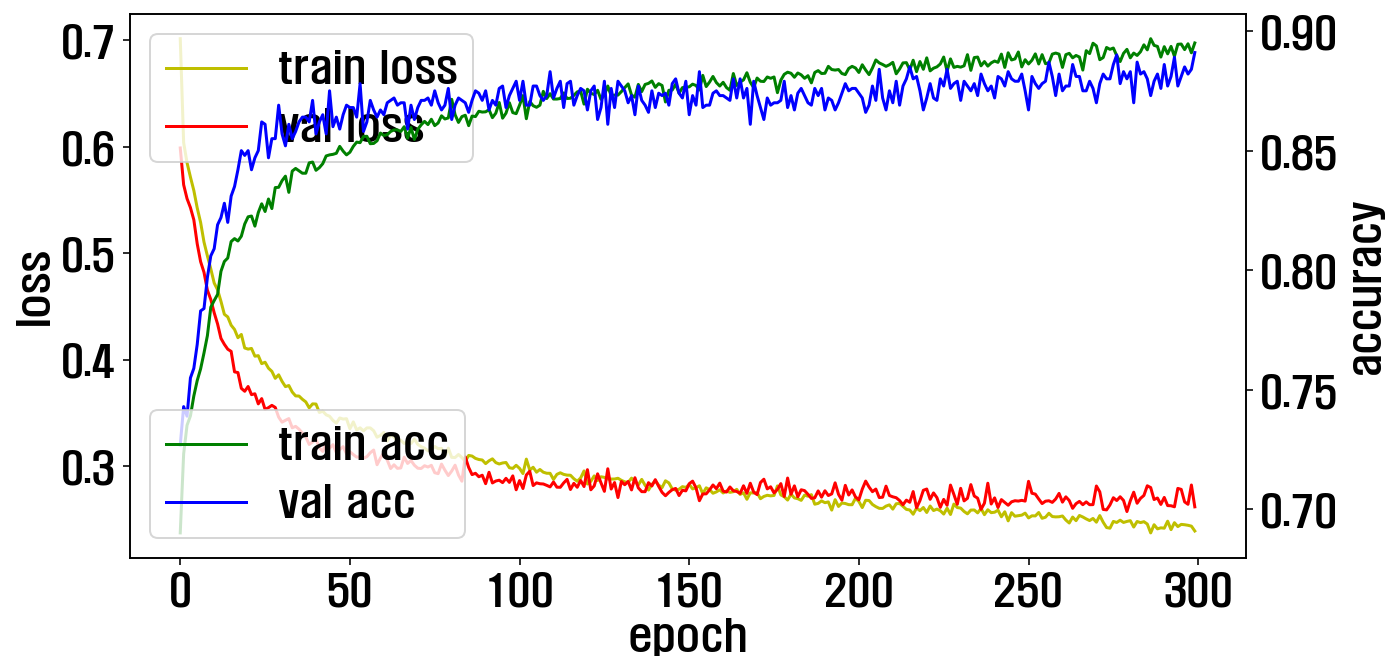

In [51]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'],'y',label="train loss")
loss_ax.plot(hist.history['val_loss'],'r', label="val loss")

acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'],'g', label="train acc")
acc_ax.plot(hist.history['val_accuracy'],'b', label="val acc")

loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")
loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

In [52]:
score = model.evaluate(X_v, Y_v, batch_size=1)
score

1000/1000 [==============================] - 1s 900us/step - loss: 0.2616 - accuracy: 0.8910


[0.26159611344337463, 0.890999972820282]

# 모델 저장하기

In [70]:
model_json = model.to_json()
with open("CNN_fashion_mnist_model.json", "w") as json_file: 
    json_file.write(model_json)
model.save_weights("CNN_fashion_mnist_model.h5")
print("Saved model to disk")

Saved model to disk


# 모델 불러오기

In [71]:
from tensorflow.compat.v2.keras.models import model_from_json
json_file = open("CNN_fashion_mnist_model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close()

# json파일로부터 model 로드하기 
loaded_model = model_from_json(loaded_model_json) 

# 로드한 model에 weight 로드하기 
loaded_model.load_weights("CNN_fashion_mnist_model.h5") 
print("Loaded model from disk")

Loaded model from disk


# scaler 저장

In [129]:
import joblib
joblib.dump(scaler, 'scaler.save')

['scaler.save']

# scaler 불러오기

In [133]:
# scaler=joblib.load('scaler.save')

In [73]:
def trans_data(n1,n2,n3,n4,n5,n6,n7,n8,n9):
    df=np.array([[n1,n2,n3,n4,n5,n6,n7,n8,n9]],dtype=np.float64)
    s_input = scaler.transform(df)
    return s_input

In [135]:
loaded_model.predict_classes(trans_data(26, 0, 23.7, 39.0, 23.3, 31.0, 150.0, 24.2, 21.1))[0]

2

# 예측하기

In [53]:
def trans_data(n1,n2,n3,n4,n5,n6,n7,n8,n9):
    df=np.array([[n1,n2,n3,n4,n5,n6,n7,n8,n9]],dtype=np.float64)
    s_input = scaler.transform(df)
    return s_input

In [54]:
adult_data.head(5)

,측정나이,측정회원성별,악력D:kg,교차윗몸일으키기:회,앉아윗몸앞으로굽히기:cm,왕복오래달리기,제자리 멀리뛰기:cm,체지방율%,BMI:kg/m,결과값
3,22,0,23.2,28.0,20.7,24.0,150.0,31.5,21.1,3
4,26,0,23.7,39.0,23.3,31.0,150.0,24.2,21.1,2
5,48,0,19.0,4.0,-0.3,10.0,152.0,27.0,21.6,0
6,47,0,25.4,26.0,20.1,16.0,155.0,30.6,21.8,3
8,53,0,23.4,1.0,20.6,16.0,125.0,30.9,22.3,0


In [55]:
model.predict_classes(trans_data(22, 0, 23.2, 28.0, 20.7, 24.0, 150.0, 31.5, 21.1))

array([3], dtype=int64)

In [56]:
model.predict_classes(trans_data(26, 0, 23.7, 39.0, 23.3, 31.0, 150.0, 24.2, 21.1))[0]

2

In [57]:
model.predict_classes(trans_data(48, 0, 19.0, 4.0, -0.3, 10., 152.0, 27.0, 21.6))

array([0], dtype=int64)

# 프로그램

In [58]:
def trans(n1,n2,n3,n4,n5,n6,n7,n8,n9):
    df=np.array([[n1,n2,n3,n4,n5,n6,n7,n8,n9]],dtype=np.float64)
    s_input = scaler.transform(df)
    return s_input

In [59]:
adult_data.tail(1)

,측정나이,측정회원성별,악력D:kg,교차윗몸일으키기:회,앉아윗몸앞으로굽히기:cm,왕복오래달리기,제자리 멀리뛰기:cm,체지방율%,BMI:kg/m,결과값
571170,49,0,30.4,37.0,26.3,23.0,159.0,25.9,21.4,1


In [60]:
adult_data.head(1)

,측정나이,측정회원성별,악력D:kg,교차윗몸일으키기:회,앉아윗몸앞으로굽히기:cm,왕복오래달리기,제자리 멀리뛰기:cm,체지방율%,BMI:kg/m,결과값
3,22,0,23.2,28.0,20.7,24.0,150.0,31.5,21.1,3


In [136]:
age=float(input('나이를 입력하시오'))
gender=float(input('남성:1 , 여성:0를 입력하시오'))
power=float(input('악력 값을 입력하시오'))
sit_up=float(input('윗몸일으키기 횟수를 입력하시오'))
bending=float(input('앉아윗몸앞으로굽히기:cm 값을 입력하시오'))
run=float(input('오래 달리기 횟수를 입력하시오'))
jump=float(input('제자리 멀리뛰기 cm 값을 입력하시오'))
body_fat=float(input('체지방 율을 입력하시오'))
BMI=float(input('체질량 지수(BMI)값을 입력하시오'))

def trans(n1,n2,n3,n4,n5,n6,n7,n8,n9):
    df=np.array([[n1,n2,n3,n4,n5,n6,n7,n8,n9]],dtype=np.float64)
    s_input = scaler.transform(df)
    return s_input

body_range=model.predict_classes(trans(age,gender,power,sit_up,bending,run,jump,body_fat,BMI))[0]

if body_range==3:
    print ('신체등급 예상 3등급이 나오셨습니다. 꾸준한 운동이 필요합니다')
elif body_range==2:
    print('신체등급 예상 2등급이 나오셨습니다, 건강한 신체를 가지고 계십니다')
elif body_range==1:
    print('신체등급 예상 1등급이 나오셨습니다, 피지컬 대마왕')
elif body_range==0:
    print('아쉽지만 건강등급조건에 만족하지 않으셨습니다. 참가증 받아가세요')

나이를 입력하시오220
남성:1 , 여성:0를 입력하시오0
악력 값을 입력하시오23.2
윗몸일으키기 횟수를 입력하시오28.0
앉아윗몸앞으로굽히기:cm 값을 입력하시오20.7
오래 달리기 횟수를 입력하시오24.0
제자리 멀리뛰기 cm 값을 입력하시오150.0
체지방 율을 입력하시오31.5
체질량 지수(BMI)값을 입력하시오21.1
신체등급 예상 1등급이 나오셨습니다, 피지컬 대마왕
